<a href="https://colab.research.google.com/github/comraderino/astroo/blob/main/astrohw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#MEHMET KANAR 090170131

import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as spc
import sympy as sym

In [ ]:
def plaw(nu,T):
  a = (2*(spc.h)*nu**3) / ((spc.c)**2)
  e_term = np.exp(((spc.h)*nu)/((spc.k)*T))
  intensity = a /(e_term - 1)
  return intensity

In [ ]:
frq = np.linspace(1e+6, 1e+17, 100000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


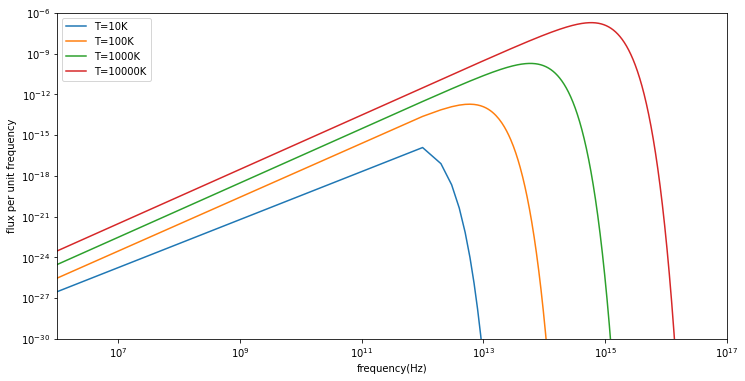

In [ ]:



fig, ax = plt.subplots(figsize=(12, 6))

plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-30, 1e-06)
plt.xlim(1e+06, 1e+17)
plt.plot(frq, plaw(frq,10.), label='T=10K')
plt.plot(frq, plaw(frq,100.), label='T=100K')
plt.plot(frq, plaw(frq,1000.), label='T=1000K')
plt.plot(frq, plaw(frq,10000.), label='T=10000K')
plt.xlabel('frequency(Hz)')
plt.ylabel('flux per unit frequency')
plt.legend()




In [ ]:
nu = sym.Symbol('nu')
h = sym.Symbol('h')
c = sym.Symbol('c')
T = sym.Symbol('T')
k = sym.Symbol('k')

a = ((2*h*nu**3) / (c**2))

e_term = sym.exp((h*nu)/(k*T))

intensity = a /(e_term - 1)


der = sym.diff(intensity, nu)

der

6*h*nu**2/(c**2*(exp(h*nu/(T*k)) - 1)) - 2*h**2*nu**3*exp(h*nu/(T*k))/(T*c**2*k*(exp(h*nu/(T*k)) - 1)**2)

In [ ]:
der1 = der*(c**2)/(h*nu**2)

der1

c**2*(6*h*nu**2/(c**2*(exp(h*nu/(T*k)) - 1)) - 2*h**2*nu**3*exp(h*nu/(T*k))/(T*c**2*k*(exp(h*nu/(T*k)) - 1)**2))/(h*nu**2)

In [ ]:
derr = der1.subs((h*nu)/(k*T), x)

derr

c**2*(-2*h*nu**2*x*exp(x)/(c**2*(exp(x) - 1)**2) + 6*h*nu**2/(c**2*(exp(x) - 1)))/(h*nu**2)

In [ ]:
eq = sym.Eq(derr,0)

eq

Eq(c**2*(-2*h*nu**2*x*exp(x)/(c**2*(exp(x) - 1)**2) + 6*h*nu**2/(c**2*(exp(x) - 1)))/(h*nu**2), 0)

In [ ]:
eq2 = sym.simplify(eq)

eq2

Eq(2*(-x*exp(x) + 3*exp(x) - 3)/(1 - exp(x))**2, 0)

In [ ]:
eq3 = eq2.evalf()

sol = sym.solve(eq3, x)

sol
print('x= ', sol)

x=  [2.82143937212208]


In [ ]:
nu = sym.Symbol('nu')
h = sym.Symbol('h')
c = sym.Symbol('c')
T = sym.Symbol('T')
k = sym.Symbol('k')

a = ((2*h*nu**3) / (c**2))

e_term = sym.exp((h*nu)/(k*T))

intensity = a /(e_term - 1)

intensity.subs((h*nu)/(k*T), x)

sblaw = sym.pi*sym.integrate(intensity, (nu, 0, sym.oo))

sblaw

2*pi*h*Integral(nu**3/(exp(h*nu/(T*k)) - 1), (nu, 0, oo))/c**2

$x=\frac{h\nu}{kT}$

 so 

$ϵ = \frac{2\pi h}{c^2}(\frac{kT}{h})^4 \int_{0}^{\infty} \frac{x^3}{e^x-1} \,dx$

$\int_{0}^{\infty} \frac{x^3}{e^x-1} \,dx = \frac{\pi^4}{15}$

$\epsilon = \frac{2\pi h}{c^2}(\frac{kT}{h})^4  \frac{\pi^4}{15} $ 

$\epsilon = \frac{2\pi^5 k^4 T^4}{15 h^3 c^2} $ 

$\sigma = \frac{2\pi^5 k^4 }{15 h^3 c^2} $ 

so

$\epsilon = \sigma T^4$